In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

C:\Users\PROVIDENCE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


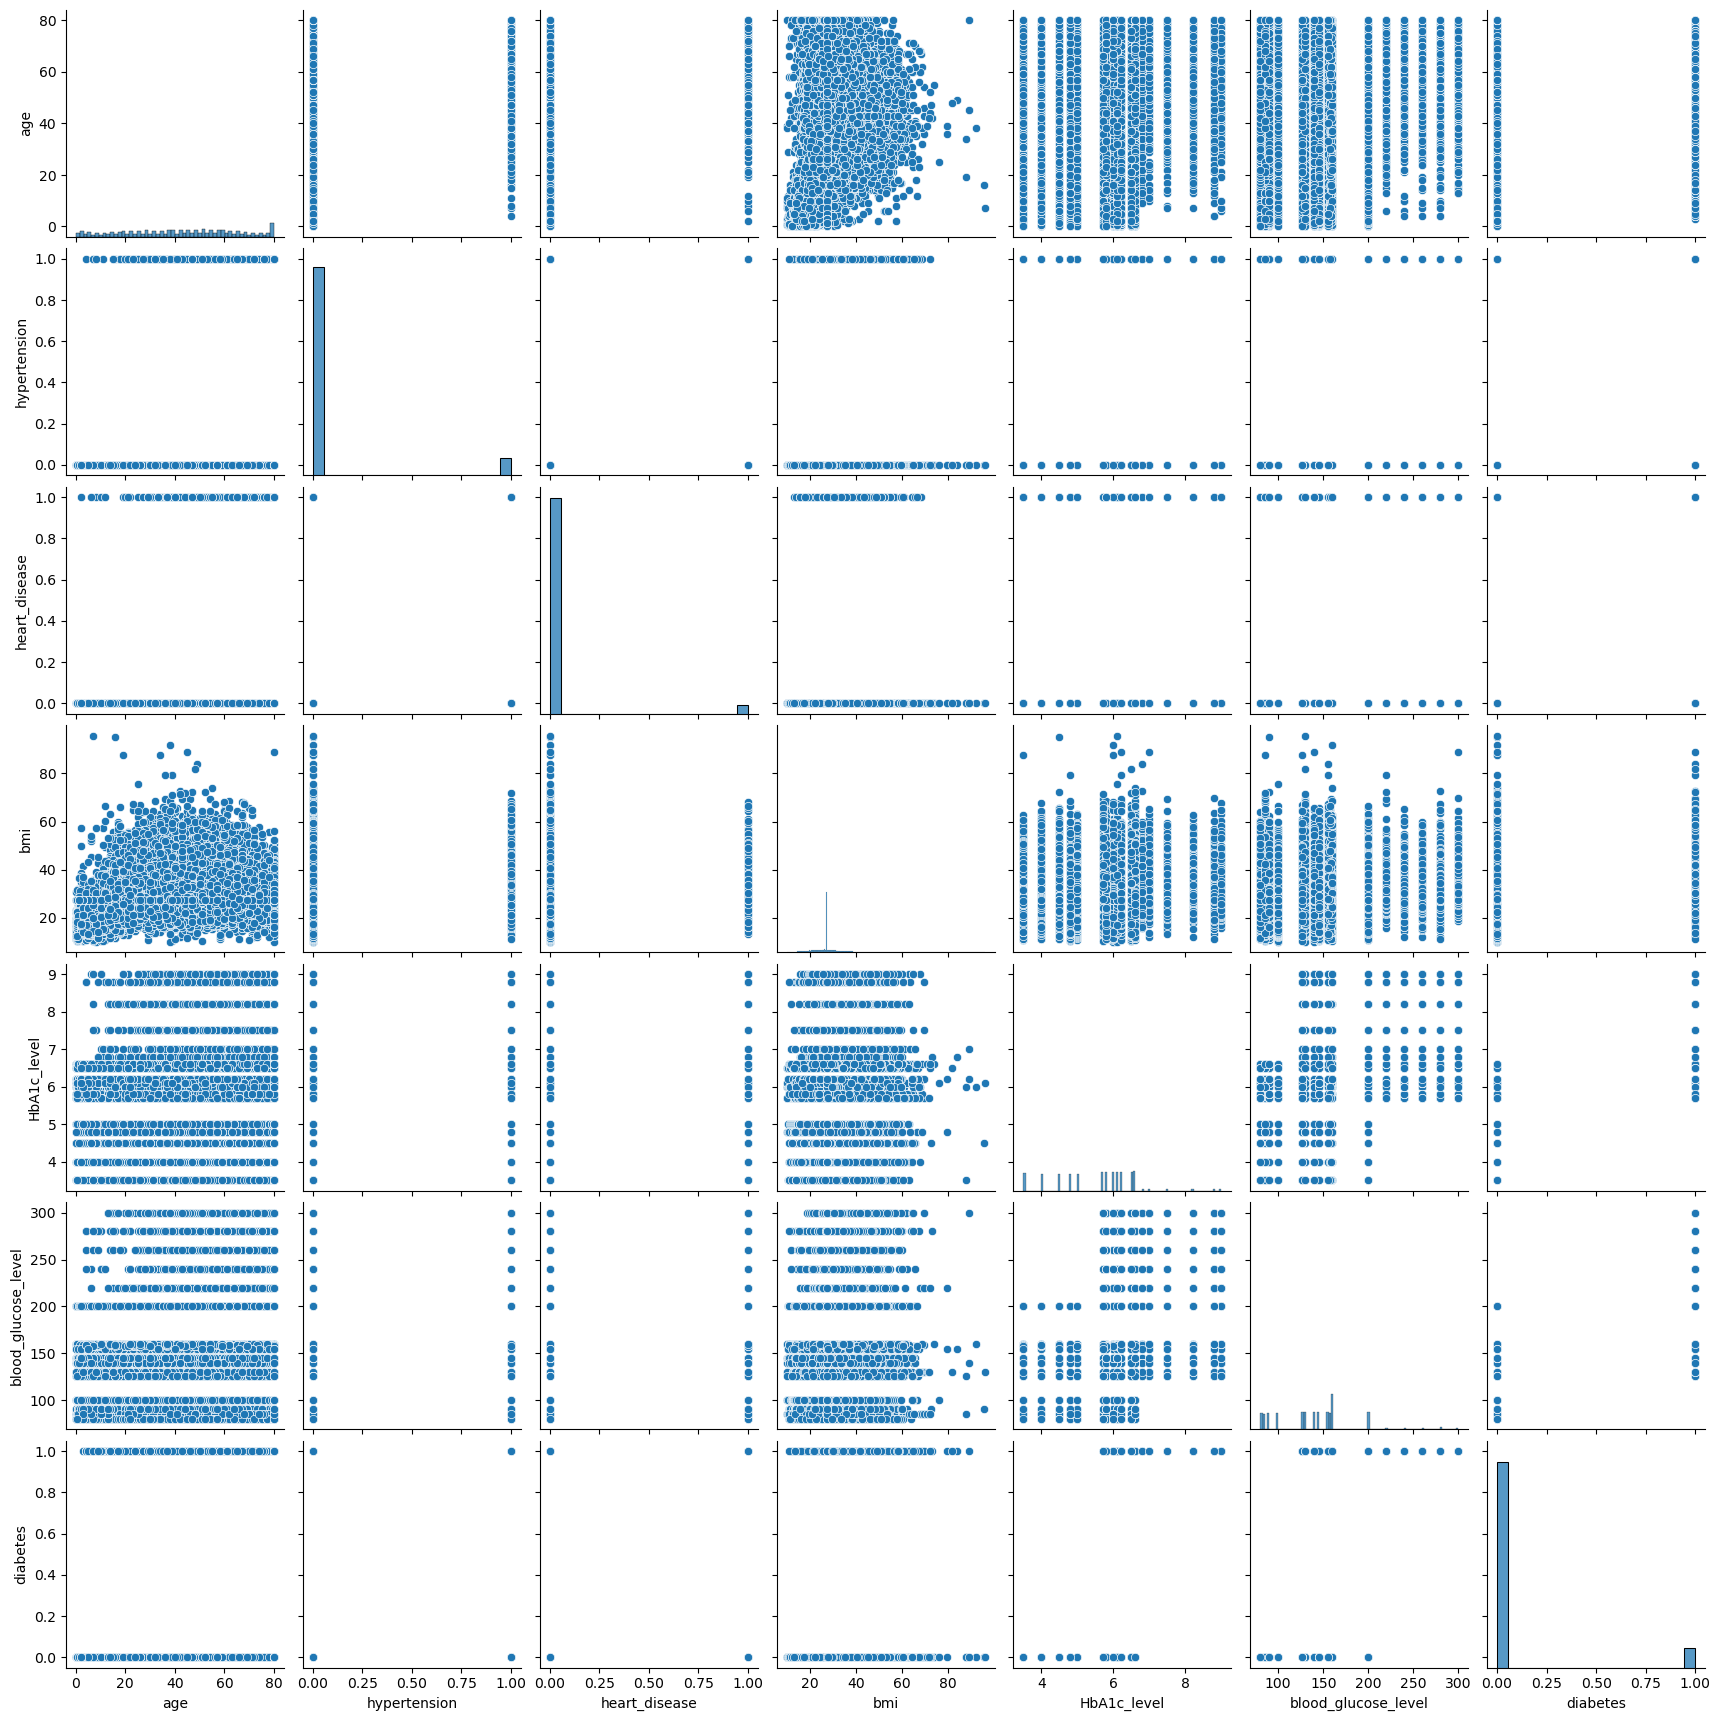

In [5]:
sns.pairplot(data)

In [6]:
for i in data.columns:
    print(f"the  unique number od {i} is: {data[i].nunique()}")

the  unique number od gender is: 3
the  unique number od age is: 102
the  unique number od hypertension is: 2
the  unique number od heart_disease is: 2
the  unique number od smoking_history is: 6
the  unique number od bmi is: 4247
the  unique number od HbA1c_level is: 18
the  unique number od blood_glucose_level is: 18
the  unique number od diabetes is: 2


In [7]:
data["age"].nunique()

102

In [8]:
data.smoking_history.unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [10]:
data.groupby(["smoking_history","gender"]).size().reset_index()

,smoking_history,gender,0
0,No Info,Female,19700
1,No Info,Male,16110
2,No Info,Other,6
3,current,Female,5058
4,current,Male,4228
5,ever,Female,2238
6,ever,Male,1765
7,ever,Other,1
8,former,Female,4774
9,former,Male,4578


In [11]:
data.gender.value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [12]:
data.groupby("gender")["age"].mean().reset_index()

,gender,age
0,Female,42.463291
1,Male,41.075139
2,Other,29.555556


In [13]:
data.gender = data.gender.str.replace("Other","Male")

In [14]:
data.gender.nunique()

2

In [15]:
data.smoking_history.unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [16]:
data.groupby("smoking_history").size().reset_index()

,smoking_history,0
0,No Info,35816
1,current,9286
2,ever,4004
3,former,9352
4,never,35095
5,not current,6447


In [17]:
data.smoking_history = data.smoking_history.str.replace("former","not current")
data.smoking_history = data.smoking_history.str.replace("never","not current")
data.smoking_history.unique()

array(['not current', 'No Info', 'current', 'ever'], dtype=object)

In [18]:
 data.groupby("smoking_history").size().reset_index()

,smoking_history,0
0,No Info,35816
1,current,9286
2,ever,4004
3,not current,50894


In [19]:
data[data["smoking_history"] == "No Info" ]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
14,Female,76.0,0,0,No Info,27.32,5.0,160,0
15,Male,78.0,0,0,No Info,27.32,6.6,126,0
18,Female,42.0,0,0,No Info,27.32,5.7,80,0
...,...,...,...,...,...,...,...,...,...
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0


In [20]:
data.smoking_history = data.smoking_history.str.replace("NaN", "No Info")

In [21]:
data.smoking_history.unique()

array(['not current', 'No Info', 'current', 'ever'], dtype=object)

In [22]:
data_heart_d_1 = data[data.smoking_history == "No Info"][data.heart_disease == 1] 
data_heart_d_1

C:\Users\PROVIDENCE\AppData\Local\Temp\ipykernel_4056\457642787.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_heart_d_1 = data[data.smoking_history == "No Info"][data.heart_disease == 1]


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
366,Male,80.0,0,1,No Info,32.37,6.6,80,0
1137,Male,79.0,0,1,No Info,27.32,5.8,140,0
1258,Female,51.0,0,1,No Info,40.39,6.0,155,0
1356,Female,80.0,0,1,No Info,20.56,4.8,130,0
1521,Male,80.0,0,1,No Info,27.32,6.5,200,0
...,...,...,...,...,...,...,...,...,...
99271,Male,56.0,1,1,No Info,31.40,7.0,220,1
99403,Male,76.0,1,1,No Info,35.05,6.6,85,0
99440,Male,67.0,1,1,No Info,25.31,6.6,145,0
99627,Female,77.0,0,1,No Info,30.09,5.8,158,0


In [23]:
data_heart_d_0 = data[data.smoking_history == "No Info"][data.heart_disease == 0] 
data_heart_d_0

C:\Users\PROVIDENCE\AppData\Local\Temp\ipykernel_4056\3000564821.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_heart_d_0 = data[data.smoking_history == "No Info"][data.heart_disease == 0]


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
14,Female,76.0,0,0,No Info,27.32,5.0,160,0
15,Male,78.0,0,0,No Info,27.32,6.6,126,0
18,Female,42.0,0,0,No Info,27.32,5.7,80,0
...,...,...,...,...,...,...,...,...,...
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0


In [24]:
data.smoking_history = data.smoking_history.str.replace("No Info", "ever")

In [25]:
data.smoking_history.unique()

array(['not current', 'ever', 'current'], dtype=object)

In [26]:
data.sample(n=5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
32103,Male,33.0,1,0,not current,32.41,5.7,80,0
38279,Female,40.0,0,0,ever,20.33,6.0,90,0
82744,Male,38.0,0,0,ever,40.59,4.8,155,0
50545,Female,7.0,0,0,ever,16.71,6.0,90,0
35061,Male,26.0,0,0,ever,26.47,4.8,155,0


In [27]:
gend = pd.get_dummies(data.gender,dtype = int)
new_data = pd.concat([data,gend],axis = 1)
new_data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male
0,Female,80.0,0,1,not current,25.19,6.6,140,0,1,0
1,Female,54.0,0,0,ever,27.32,6.6,80,0,1,0
2,Male,28.0,0,0,not current,27.32,5.7,158,0,0,1
3,Female,36.0,0,0,current,23.45,5.0,155,0,1,0
4,Male,76.0,1,1,current,20.14,4.8,155,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,ever,27.32,6.2,90,0,1,0
99996,Female,2.0,0,0,ever,17.37,6.5,100,0,1,0
99997,Male,66.0,0,0,not current,27.83,5.7,155,0,0,1
99998,Female,24.0,0,0,not current,35.42,4.0,100,0,1,0


In [28]:
smoke = pd.get_dummies(data.smoking_history,dtype = int)
new_data = pd.concat([new_data,smoke],axis = 1)
new_data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,current,ever,not current
0,Female,80.0,0,1,not current,25.19,6.6,140,0,1,0,0,0,1
1,Female,54.0,0,0,ever,27.32,6.6,80,0,1,0,0,1,0
2,Male,28.0,0,0,not current,27.32,5.7,158,0,0,1,0,0,1
3,Female,36.0,0,0,current,23.45,5.0,155,0,1,0,1,0,0
4,Male,76.0,1,1,current,20.14,4.8,155,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,ever,27.32,6.2,90,0,1,0,0,1,0
99996,Female,2.0,0,0,ever,17.37,6.5,100,0,1,0,0,1,0
99997,Male,66.0,0,0,not current,27.83,5.7,155,0,0,1,0,0,1
99998,Female,24.0,0,0,not current,35.42,4.0,100,0,1,0,0,0,1


In [29]:
new_data.drop(["smoking_history","gender"],axis = 1,inplace = True)

In [30]:
new_data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,current,ever,not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,1
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,1
3,36.0,0,0,23.45,5.0,155,0,1,0,1,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,1,0,0,1,0
99996,2.0,0,0,17.37,6.5,100,0,1,0,0,1,0
99997,66.0,0,0,27.83,5.7,155,0,0,1,0,0,1
99998,24.0,0,0,35.42,4.0,100,0,1,0,0,0,1


In [31]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00
Female,100000.0,0.585520,0.492635,0.00,0.00,1.00,1.00,1.00
Male,100000.0,0.414480,0.492635,0.00,0.00,0.00,1.00,1.00
current,100000.0,0.092860,0.290238,0.00,0.00,0.00,0.00,1.00


In [32]:
new_data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,current,ever,not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,1
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,1
3,36.0,0,0,23.45,5.0,155,0,1,0,1,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,1,0,0,1,0
99996,2.0,0,0,17.37,6.5,100,0,1,0,0,1,0
99997,66.0,0,0,27.83,5.7,155,0,0,1,0,0,1
99998,24.0,0,0,35.42,4.0,100,0,1,0,0,0,1


In [33]:
new_data_selected = new_data.corr()["diabetes"][new_data.corr()["diabetes"]>0.1]
new_data_selected

age                    0.258008
hypertension           0.197823
heart_disease          0.171727
bmi                    0.214357
HbA1c_level            0.400660
blood_glucose_level    0.419558
diabetes               1.000000
Name: diabetes, dtype: float64

In [34]:
new_data_selected_va = new_data.loc[:,new_data_selected.index]
new_data_selected_va

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0
99996,2.0,0,0,17.37,6.5,100,0
99997,66.0,0,0,27.83,5.7,155,0
99998,24.0,0,0,35.42,4.0,100,0


In [35]:
new_data_selected_y = new_data_selected_va.diabetes
new_data_selected_y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [36]:
new_data_selected_x = new_data_selected_va.drop("diabetes",axis = 1)
new_data_selected_x

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,80.0,0,1,25.19,6.6,140
1,54.0,0,0,27.32,6.6,80
2,28.0,0,0,27.32,5.7,158
3,36.0,0,0,23.45,5.0,155
4,76.0,1,1,20.14,4.8,155
...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90
99996,2.0,0,0,17.37,6.5,100
99997,66.0,0,0,27.83,5.7,155
99998,24.0,0,0,35.42,4.0,100


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test = train_test_split(new_data_selected_x,new_data_selected_y,test_size = 0.3, shuffle = True, random_state = 101)

In [39]:
y_test

56324    0
52881    0
60647    0
42046    0
9912     0
        ..
95072    0
84693    0
11015    0
59628    0
839      0
Name: diabetes, Length: 30000, dtype: int64

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [41]:
gb = GaussianNB()
sv = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()

In [42]:
gb.fit(x_train,y_train)
sv.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)

KNeighborsClassifier()

# Train Scores

In [43]:
print(f"the score for gb {gb.score(x_train,y_train).round(2)* 100}")

the score for gb 90.0


In [44]:
print(f"the score for sv {sv.score(x_train,y_train).round(2)* 100}")

the score for sv 95.0


In [45]:
print(f"the score for dt {dt.score(x_train,y_train).round(2)* 100}")

the score for dt 100.0


In [46]:
print(f"the score for rf {rf.score(x_train,y_train).round(2)* 100}")

the score for rf 100.0


In [47]:
print(f"the score for kn {kn.score(x_train,y_train).round(2)* 100}")

the score for kn 96.0


In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

# Test Scores

In [49]:
y_pred_gb = gb.predict(x_test)
print(f"the score for gb is {accuracy_score(y_test,y_pred_gb).round(2)* 100}")

the score for gb is 90.0


In [50]:
y_pred_sv = sv.predict(x_test)
print(f"the score for sv is {accuracy_score(y_test,y_pred_sv).round(2)* 100}")

the score for sv is 95.0


In [51]:
y_pred_dt = dt.predict(x_test)
print(f"the score for dt is {accuracy_score(y_test,y_pred_dt).round(2)* 100}")

the score for dt is 95.0


In [52]:
y_pred_rf = rf.predict(x_test)
print(f"the score for rf is {accuracy_score(y_test,y_pred_rf).round(2)* 100}") 

the score for rf is 97.0


In [53]:
y_pred_kn = kn.predict(x_test)
print(f"the score for kn is {accuracy_score(y_test,y_pred_kn).round(2)* 100}")

the score for kn is 95.0


# Confusion matrix with display

confusion matrix diplay for gb


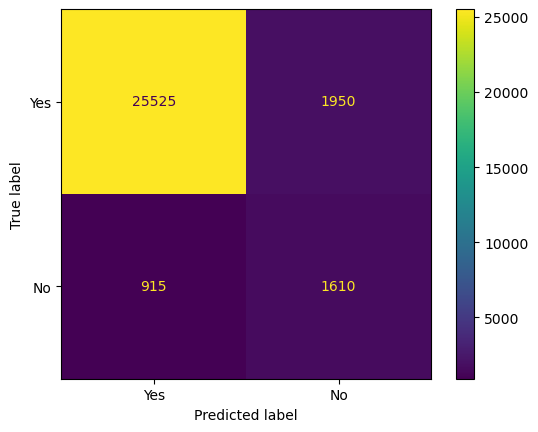

In [54]:
print(f"confusion matrix diplay for gb")
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_gb),display_labels =  ["Yes","No"]).plot()

confusion matrix diplay for sv


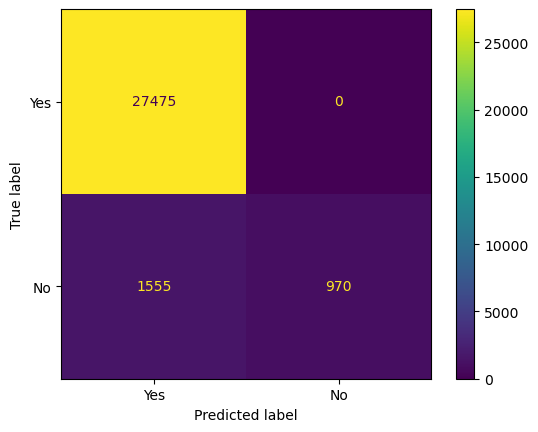

In [55]:
print(f"confusion matrix diplay for sv")
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_sv),display_labels =  ["Yes","No"]).plot()

confusion matrix diplay for dt


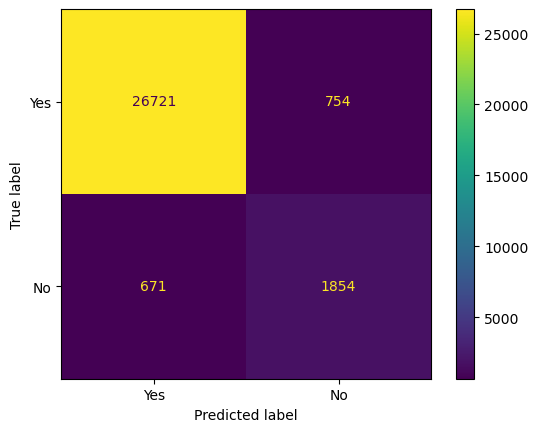

In [56]:
print(f"confusion matrix diplay for dt")
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_dt),display_labels =  ["Yes","No"]).plot()

confusion matrix diplay for rf


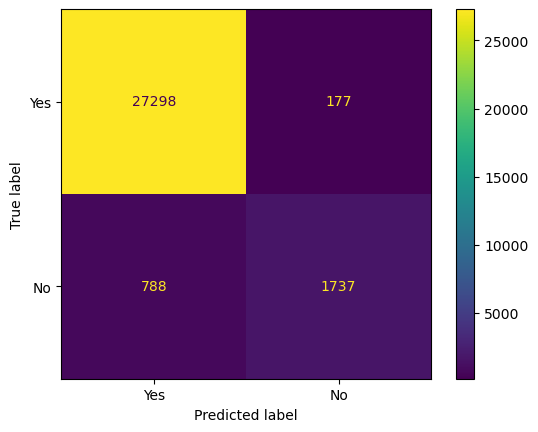

In [57]:
print(f"confusion matrix diplay for rf")
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_rf),display_labels =  ["Yes","No"]).plot()

confusion matrix diplay for kn


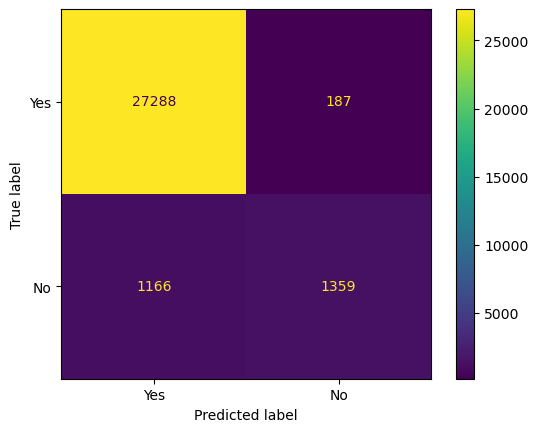

In [58]:
print(f"confusion matrix diplay for kn")
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_kn),display_labels =  ["Yes","No"]).plot()

# Classification report for each model

In [78]:
print(f"the classification for gb is {classification_report(y_pred_gb,y_test)}")

the classification for gb is               precision    recall  f1-score   support

           0       0.93      0.97      0.95     26440
           1       0.64      0.45      0.53      3560

    accuracy                           0.90     30000
   macro avg       0.78      0.71      0.74     30000
weighted avg       0.89      0.90      0.90     30000



In [66]:
print(f"the classification for sv is {classification_report(y_pred_sv,y_test)}")

the classification for sv is               precision    recall  f1-score   support

           0       1.00      0.95      0.97     29030
           1       0.38      1.00      0.56       970

    accuracy                           0.95     30000
   macro avg       0.69      0.97      0.76     30000
weighted avg       0.98      0.95      0.96     30000



In [68]:
print(f"the classification for dt is {classification_report(y_pred_dt,y_test)}")

the classification for dt is               precision    recall  f1-score   support

           0       0.97      0.98      0.97     27392
           1       0.73      0.71      0.72      2608

    accuracy                           0.95     30000
   macro avg       0.85      0.84      0.85     30000
weighted avg       0.95      0.95      0.95     30000



In [69]:
print(f"the classification for rf is {classification_report(y_pred_rf,y_test)}")

the classification for rf is               precision    recall  f1-score   support

           0       0.99      0.97      0.98     28086
           1       0.69      0.91      0.78      1914

    accuracy                           0.97     30000
   macro avg       0.84      0.94      0.88     30000
weighted avg       0.97      0.97      0.97     30000



In [70]:
print(f"the classification for kn is {classification_report(y_pred_kn,y_test)}")

the classification for kn is               precision    recall  f1-score   support

           0       0.99      0.96      0.98     28454
           1       0.54      0.88      0.67      1546

    accuracy                           0.95     30000
   macro avg       0.77      0.92      0.82     30000
weighted avg       0.97      0.95      0.96     30000

